In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ab4322","key":"2e8854f5b46c4ed4d6f38f6ec2bee4a8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 89% 132M/149M [00:01<00:00, 120MB/s]
100% 149M/149M [00:01<00:00, 97.5MB/s]


In [5]:
!unzip /content/brain-tumor-mri-dataset.zip -d /content/Dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/Dataset/Training/glioma/Tr-gl_0726.jpg  
  in

In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
train_path = '/content/Dataset/Training'
test_path = '/content/Dataset/Testing'

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
train_images = train_datagen.flow_from_directory(train_path, batch_size = 32, target_size = (200, 200))

test_datagen = ImageDataGenerator(rescale = 1./255)
test_images = test_datagen.flow_from_directory(test_path, batch_size = 32, target_size = (200, 200))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [9]:
train_y=train_images.classes
test_y=test_images.classes

In [10]:
train_images.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [11]:
train_y.shape,test_y.shape

((5712,), (1311,))

In [ ]:
import os
count0 = 0
dir_path = train_path + '/glioma'
for path in os.scandir(dir_path):

    if path.is_file():
        count0 += 1
print('glioma:', count0)

count1 = 0
dir_path = train_path + '/meningioma'
for path in os.scandir(dir_path):

    if path.is_file():
        count1 += 1
print('meningioma:', count1)

count2 = 0
dir_path = train_path + '/notumor'
for path in os.scandir(dir_path):

    if path.is_file():
        count2 += 1
print('notumor:', count2)

count3 = 0
dir_path = train_path + '/pituitary'
for path in os.scandir(dir_path):

    if path.is_file():
        count3 += 1
print('pituitary:', count3)

glioma: 1321
meningioma: 1339
notumor: 1595
pituitary: 1457


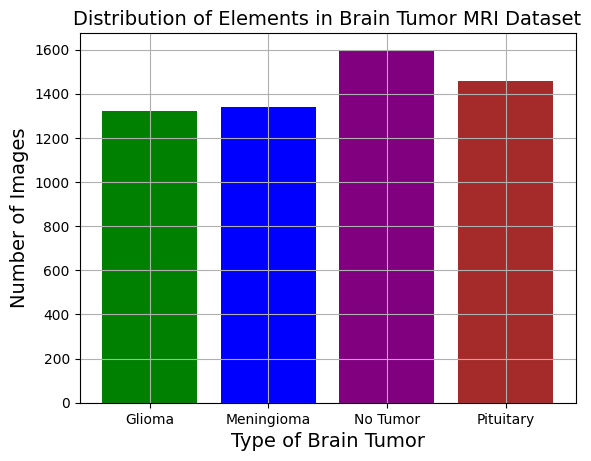

In [ ]:
Type_of_tumor = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
img_num = [count0, count1, count2, count3]

colors = ['green', 'blue', 'purple', 'brown']
plt.bar(Type_of_tumor, img_num, color=colors)
plt.title('Distribution of Elements in Brain Tumor MRI Dataset', fontsize=14)
plt.xlabel('Type of Brain Tumor', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.grid(True)
plt.show()

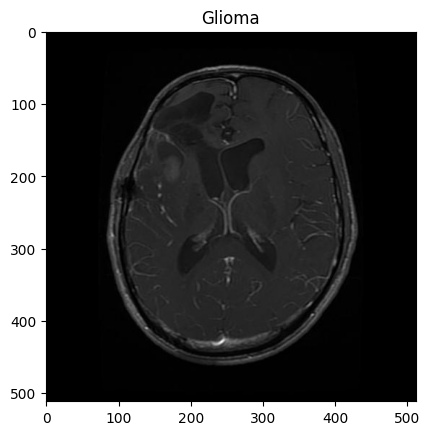

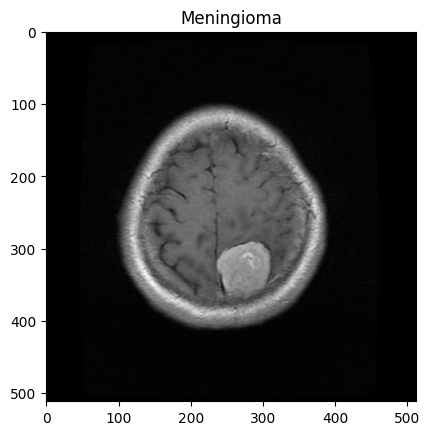

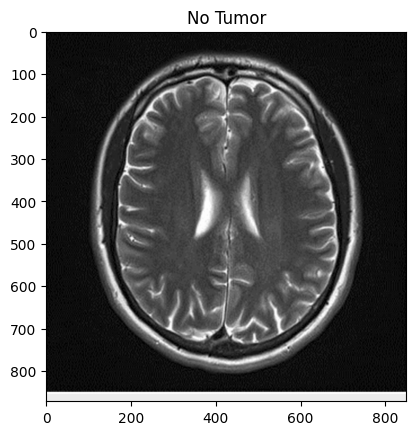

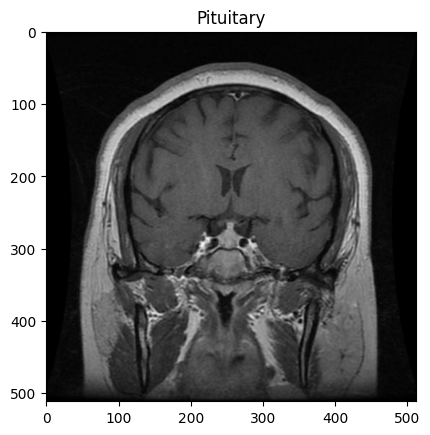

In [ ]:
path0 = train_path + '/glioma'
images = os.listdir(path0)
img_arr = []
for img in images:
  if len(img_arr) > 5:
    break
  img_arr = cv2.imread(os.path.join(path0, img))
  plt.figure()
  plt.imshow(img_arr)
  plt.title('Glioma')

path1 = train_path + '/meningioma'
images = os.listdir(path1)
img_arr = []
for img in images:
  if len(img_arr) > 5:
    break
  img_arr = cv2.imread(os.path.join(path1, img))
  plt.figure()
  plt.imshow(img_arr)
  plt.title('Meningioma')

path2 = train_path + '/notumor'
images = os.listdir(path2)
img_arr = []
for img in images:
  if len(img_arr) > 5:
    break
  img_arr = cv2.imread(os.path.join(path2, img))
  plt.figure()
  plt.imshow(img_arr)
  plt.title('No Tumor')

path3 = train_path + '/pituitary'
images = os.listdir(path3)
img_arr = []
for img in images:
  if len(img_arr) > 5:
    break
  img_arr = cv2.imread(os.path.join(path3, img))
  plt.figure()
  plt.imshow(img_arr)
  plt.title('Pituitary')